The objective is to implement a basic, naive quantum circuit simulation using statevector representation. The naive simulation does not involve optimizations or advanced techniques; instead, it directly manipulates quantum states using matrix multiplication to apply quantum gates. We will initialize a statevector, apply quantum gates such as the Hadamard and CNOT gates, and measure the runtime of these operations as the number of qubits increases. This subtask serves as a foundation for understanding how quantum circuits can be simulated in a straightforward manner, laying the groundwork for more efficient methods like tensor-based simulations.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [11]:
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0], [0,-1]])
H = np.array([[1,1], [1,-1]]) * 1/(np.sqrt(2))
CNOT = np.array([[1,0,0,0], 
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])
I = np.eye(2)

In [12]:
def initialize_state(num_qubits):
    statevector = np.zeros(2**num_qubits, dtype=complex)
    statevector[0] = 1
    return statevector

In [13]:
def apply_single_qubit_gate(state, gate, qubit_index):
    """Apply a single-qubit gate to the specified qubit in the state"""
    full_gate = np.array([1])  

    for i in range(int(np.log2(len(state)))):
        if i == qubit_index:
            full_gate = np.kron(full_gate, gate)  
        else:
            full_gate = np.kron(full_gate, I)  

    return np.dot(full_gate, state)

# qubit q is represented as |q0q1q2q3...qn>


In [14]:
state = initialize_state(4)
new_state = apply_single_qubit_gate(state, X, 0)  # Apply X gate to qubit 0
print(new_state)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [15]:
def apply_cnot_gate(state, control_index, target_index, num_qubits):
    """Apply the CNOT gate between two qubits."""
    
    # Reshape the state into a tensor of shape (2, 2, ..., 2) for easy manipulation
    state_tensor = np.reshape(state, [2] * num_qubits)
    
    # Iterate through all basis states and apply the CNOT transformation
    for i in range(2**num_qubits):
        # Get binary representation of the index 
        bits = np.binary_repr(i, width=num_qubits)
        bits = list(map(int, bits))  
        
        # Apply CNOT logic: If control is 1, flip the target qubit
        if bits[control_index] == 1:
            bits[target_index] ^= 1  # Flip the target bit

        # Convert the modified bits back to an index
        new_index = int(''.join(map(str, bits)), 2)
        
        # Update the state
        state[new_index] = state[i]

    return state

In [16]:
# Example usage
state = initialize_state(3)  # Initialize the |000> state for 3 qubits
new_state = apply_single_qubit_gate(state, X, 0) # Apply X on qubit 0 
new_state = apply_cnot_gate(new_state, 0, 1, 3)  # Apply CNOT with control qubit 0 and target qubit 1

print("New state after applying CNOT gate between qubit 0 (control) and qubit 1 (target):", new_state)

New state after applying CNOT gate between qubit 0 (control) and qubit 1 (target): [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 1.+0.j 0.+0.j]


In [17]:
def quantum_circuit(num_qubits):
    """Define a quantum circuit and apply gates sequentially."""
    # Initialize the state |000...0>
    state = initialize_state(num_qubits)

    # Apply gates in sequence
    print("Initial state:", state)

    # Apply Hadamard gate to the first qubit
    state = apply_single_qubit_gate(state, H, 0)
    print("After applying H on qubit 0:", state)

    # Apply CNOT gate with control qubit 0 and target qubit 1
    state = apply_cnot_gate(state, 0, 1, num_qubits)
    print("After applying CNOT with control qubit 0 and target qubit 1:", state)

    # Apply X gate to the second qubit
    state = apply_single_qubit_gate(state, X, 1)
    print("After applying X on qubit 1:", state)

    return state

# Example usage
num_qubits = 3  # Define the number of qubits in the circuit
final_state = quantum_circuit(num_qubits)
print("Final state vector:", final_state)


Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
After applying H on qubit 0: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
After applying CNOT with control qubit 0 and target qubit 1: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
After applying X on qubit 1: [0.        +0.j 0.        +0.j 0.70710678+0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
Final state vector: [0.        +0.j 0.        +0.j 0.70710678+0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


In [18]:
def measure_runtime(num_qubits):
    """Measure the runtime for simulating the quantum circuit with num_qubits."""
    start_time = time.time()
    quantum_circuit(num_qubits)
    end_time = time.time()
    return end_time - start_time

# Example usage with runtime measurement
qubit_counts = [2, 3, 4]  # Define different numbers of qubits to test
runtimes = []

for n in qubit_counts:
    runtime = measure_runtime(n)
    runtimes.append(runtime)
    print(f"Runtime for {n} qubits: {runtime:.6f} seconds")

# Final output with the last calculated state
print("\nFinal state vector for 3 qubits:", quantum_circuit(3))

Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
After applying H on qubit 0: [0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
After applying CNOT with control qubit 0 and target qubit 1: [0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.70710678+0.j]
After applying X on qubit 1: [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.70710678+0.j]
Runtime for 2 qubits: 0.002327 seconds
Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
After applying H on qubit 0: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
After applying CNOT with control qubit 0 and target qubit 1: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
After applying X on qubit 1: [0.        +0.j 0.        +0.j 0.70710678+0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
Runtime for 3 qubits: 0.001107 seconds
Initial sta

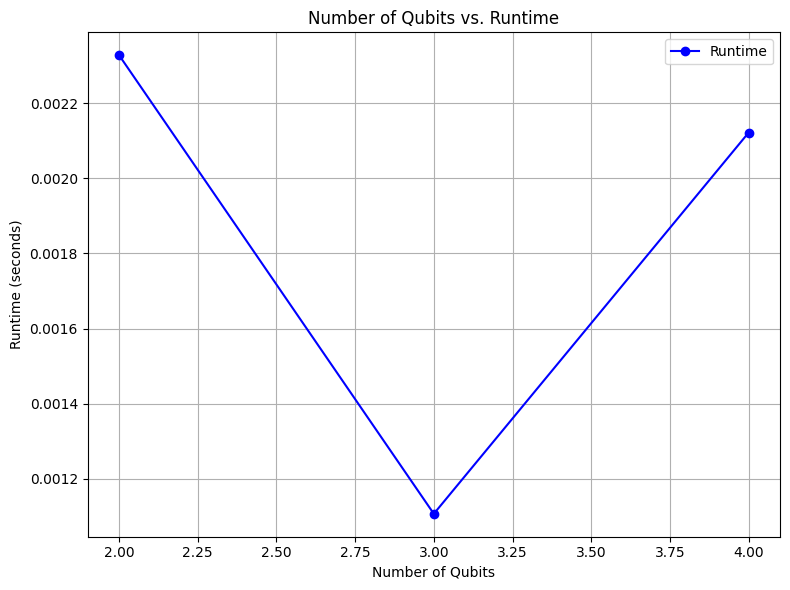

In [19]:
def plot_runtime(qubit_counts, runtimes):
    """Plot the number of qubits versus runtime."""
    plt.figure(figsize=(8, 6))
    plt.plot(qubit_counts, runtimes, marker='o', linestyle='-', color='b', label='Runtime')
    plt.title('Number of Qubits vs. Runtime')
    plt.xlabel('Number of Qubits')
    plt.ylabel('Runtime (seconds)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



# Plot the qubit count vs runtime
plot_runtime(qubit_counts, runtimes)

In [20]:
import numpy as np
# Function to sample from a quantum statevector
def sample_from_state(state_vector, num_samples=1):
    # Compute probabilities as squared magnitudes of the amplitudes
    probabilities = np.abs(state_vector.flatten()) ** 2
    
    # Ensure the probabilities sum to 1 due to possible rounding errors
    probabilities /= np.sum(probabilities)
    
    # Generate samples based on these probabilities
    num_basis_states = len(probabilities)
    basis_states = np.arange(num_basis_states)  # Basis states are 0, 1, 2, ..., 2^n - 1
    samples = np.random.choice(basis_states, p=probabilities, size=num_samples)
    
    return samples

state_vector = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2), 0, 0, 0, 0], dtype=complex)

# Sample 5 measurements from the quantum state
samples = sample_from_state(state_vector, num_samples=5)
print("Sampled basis states:", samples)


Sampled basis states: [3 0 0 3 3]


Calculating expectation value:

In [21]:
# Function to compute the expectation value of an operator
def compute_expectation_value(state_vector, operator):
    # Apply the operator to the state vector
    new_state = np.dot(operator, state_vector)
    
    # Compute the inner product of the original state and the new state
    expectation_value = np.dot(state_vector.conj().T, new_state)
    
    return np.real(expectation_value)  # Expectation values are real for Hermitian operators

# Example: Pauli-X operator
X = np.array([[0, 1], [1, 0]])

# Example 1-qubit statevector (in superposition)
state_vector = np.array([1/np.sqrt(2), 1/np.sqrt(2)], dtype=complex)

# Compute expectation value of the Pauli-X operator
expectation_X = compute_expectation_value(state_vector, X)
print("Expectation value of Pauli-X:", expectation_X)


Expectation value of Pauli-X: 0.9999999999999998
